# **Data Exploration Categorical Dataset**

* categorical Dataset n Lung Cancer
https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link?resource=download

This is a categorical dataset. All featuers, except for Age, Gender and Risk Level, are ordinal with values ranging from 1 to 7, from 1 to 8 or from 1 to 9. These values are discrete and indicate the prevalance of the feature in the patient.

## Necessary Imports

In [42]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os
#import tarfile
#import urllib
import pandas as pd
#import urllib.request

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Loading Categorical Data

With this code, I load the categorical dataset from a folder into a panda datafame 

In [43]:
LUNG_CATEGORICAL_PATH = os.path.join("..", "datasets", "2_categorical", "unprocessed")

def load_lung_categorical(lung_categorical_path=LUNG_CATEGORICAL_PATH):
    csv_path = os.path.join(lung_categorical_path, "2_categorical.csv")
    return pd.read_csv(csv_path)

lung_categorical = load_lung_categorical() 

print("Shape of data: ", lung_categorical.shape)
lung_categorical.head() #Display first five rows of the frame

Shape of data:  (1000, 26)


,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


#### Initial Observations:

There a 26 features in total, one of them is the target class - Level (Risk Level of Lung Cancer)

Most data, 21 features, are categorical and of ordinal type. With values ranging from 1 to 7 or from 1 to 8

One feature, Level - the target calss, is categorical, of ordinal type, with possible string values ["Low","Medium","High"]

Two features, index and Patient Id are simply labels for the instances and can be dropepd, as they do not provide useful information for training models, and the instances in the panda dataframe are indexed automatically.

The feature Age is numberical and ratio 

The feature Gender is of binary nominal type, taking on possible values of ["1","2"]

This dataset has 1000 instances.

In [44]:
# Drop the 'Patient Id' and 'Age' columns in place
lung_categorical.drop(columns=['Patient Id', 'index'], inplace=True)

# Verify if the columns were dropped
print("Columns after dropping 'Patient Id' and 'index':", lung_categorical.columns)

Columns after dropping 'Patient Id' and 'index': Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')


## Initial Anlysis of Dataset

In [45]:
lung_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   int64 
 2   Air Pollution             1000 non-null   int64 
 3   Alcohol use               1000 non-null   int64 
 4   Dust Allergy              1000 non-null   int64 
 5   OccuPational Hazards      1000 non-null   int64 
 6   Genetic Risk              1000 non-null   int64 
 7   chronic Lung Disease      1000 non-null   int64 
 8   Balanced Diet             1000 non-null   int64 
 9   Obesity                   1000 non-null   int64 
 10  Smoking                   1000 non-null   int64 
 11  Passive Smoker            1000 non-null   int64 
 12  Chest Pain                1000 non-null   int64 
 13  Coughing of Blood         1000 non-null   int64 
 14  Fatigue                  

In [46]:
lung_categorical.isnull().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

The data has no missing values. Every attribute of the 309 instances has a value.

In [47]:
lung_categorical.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


The range of ages is  wide, from 14 to 73, with mean being exactly in between, hinting at quite an equal spread. 

For the Gender attribute, the mean is 1.4, indicating that one gender is slightly more represented. It is unclear which gender it is, as it is not stated which is male or female, 1 and 2

For the other categorical fatures the mean is generally between 3 and 5 and std is between 1.4 and 2.5. This does not hint at any abnormalities.

In [48]:
lung_categorical['Level'].value_counts()

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64

The target class, 'Level', is quite equally distributed, which is good for training models. No oversmplng needed.

## Further Data Analysis

#### Age Dstribution

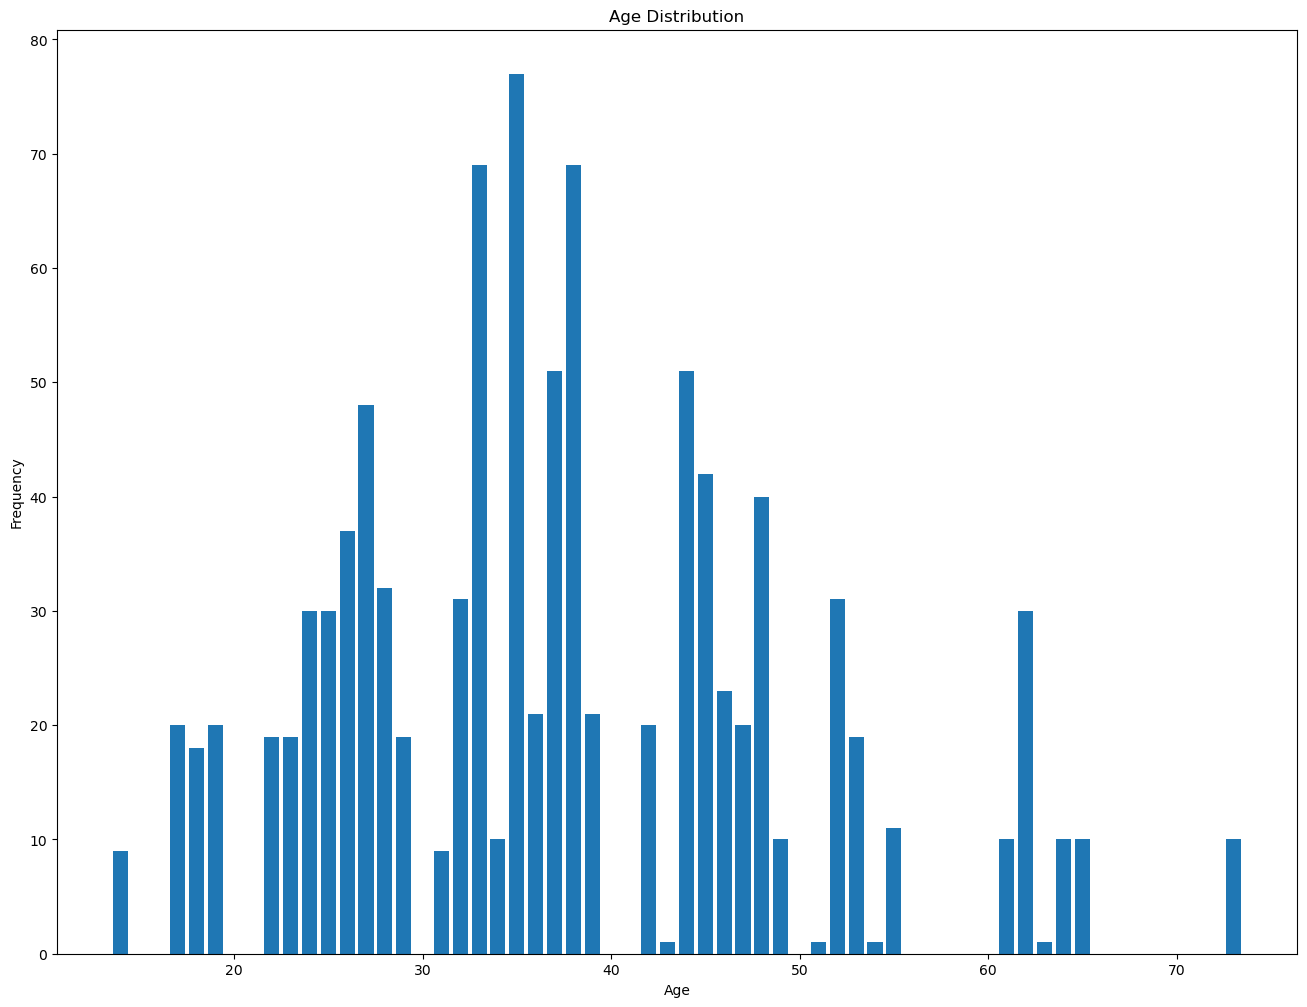

In [49]:
# Count occurrences of each age and sort by age value
age_counts = lung_categorical['Age'].value_counts().sort_index()

# Plot using bar chart for exact frequency of each age
plt.figure(figsize=(16, 12))
plt.bar(age_counts.index, age_counts.values)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


The bar chart narrowly looks like a normal distribution, with the peak at age 35. Most instances are in the range 20-50.

There are noticable abnormalities, many age values not being represented and right next to other ages which have several 10s of occurences. For example, there are many instances for ages 33, 35 and 37, but much fewer at ages 34 and 36. The same can be observed for other age values.  

Certain age ranges like 21-22, 40-41, 56-60, 66-72 are not represented at all.

This is quite unusual and there is no explanation as to why this is the case. If participants were stochastically chosenfrom the population, such abnormalities should not have been the case.

## Further Analysis

#### Feature values distributions

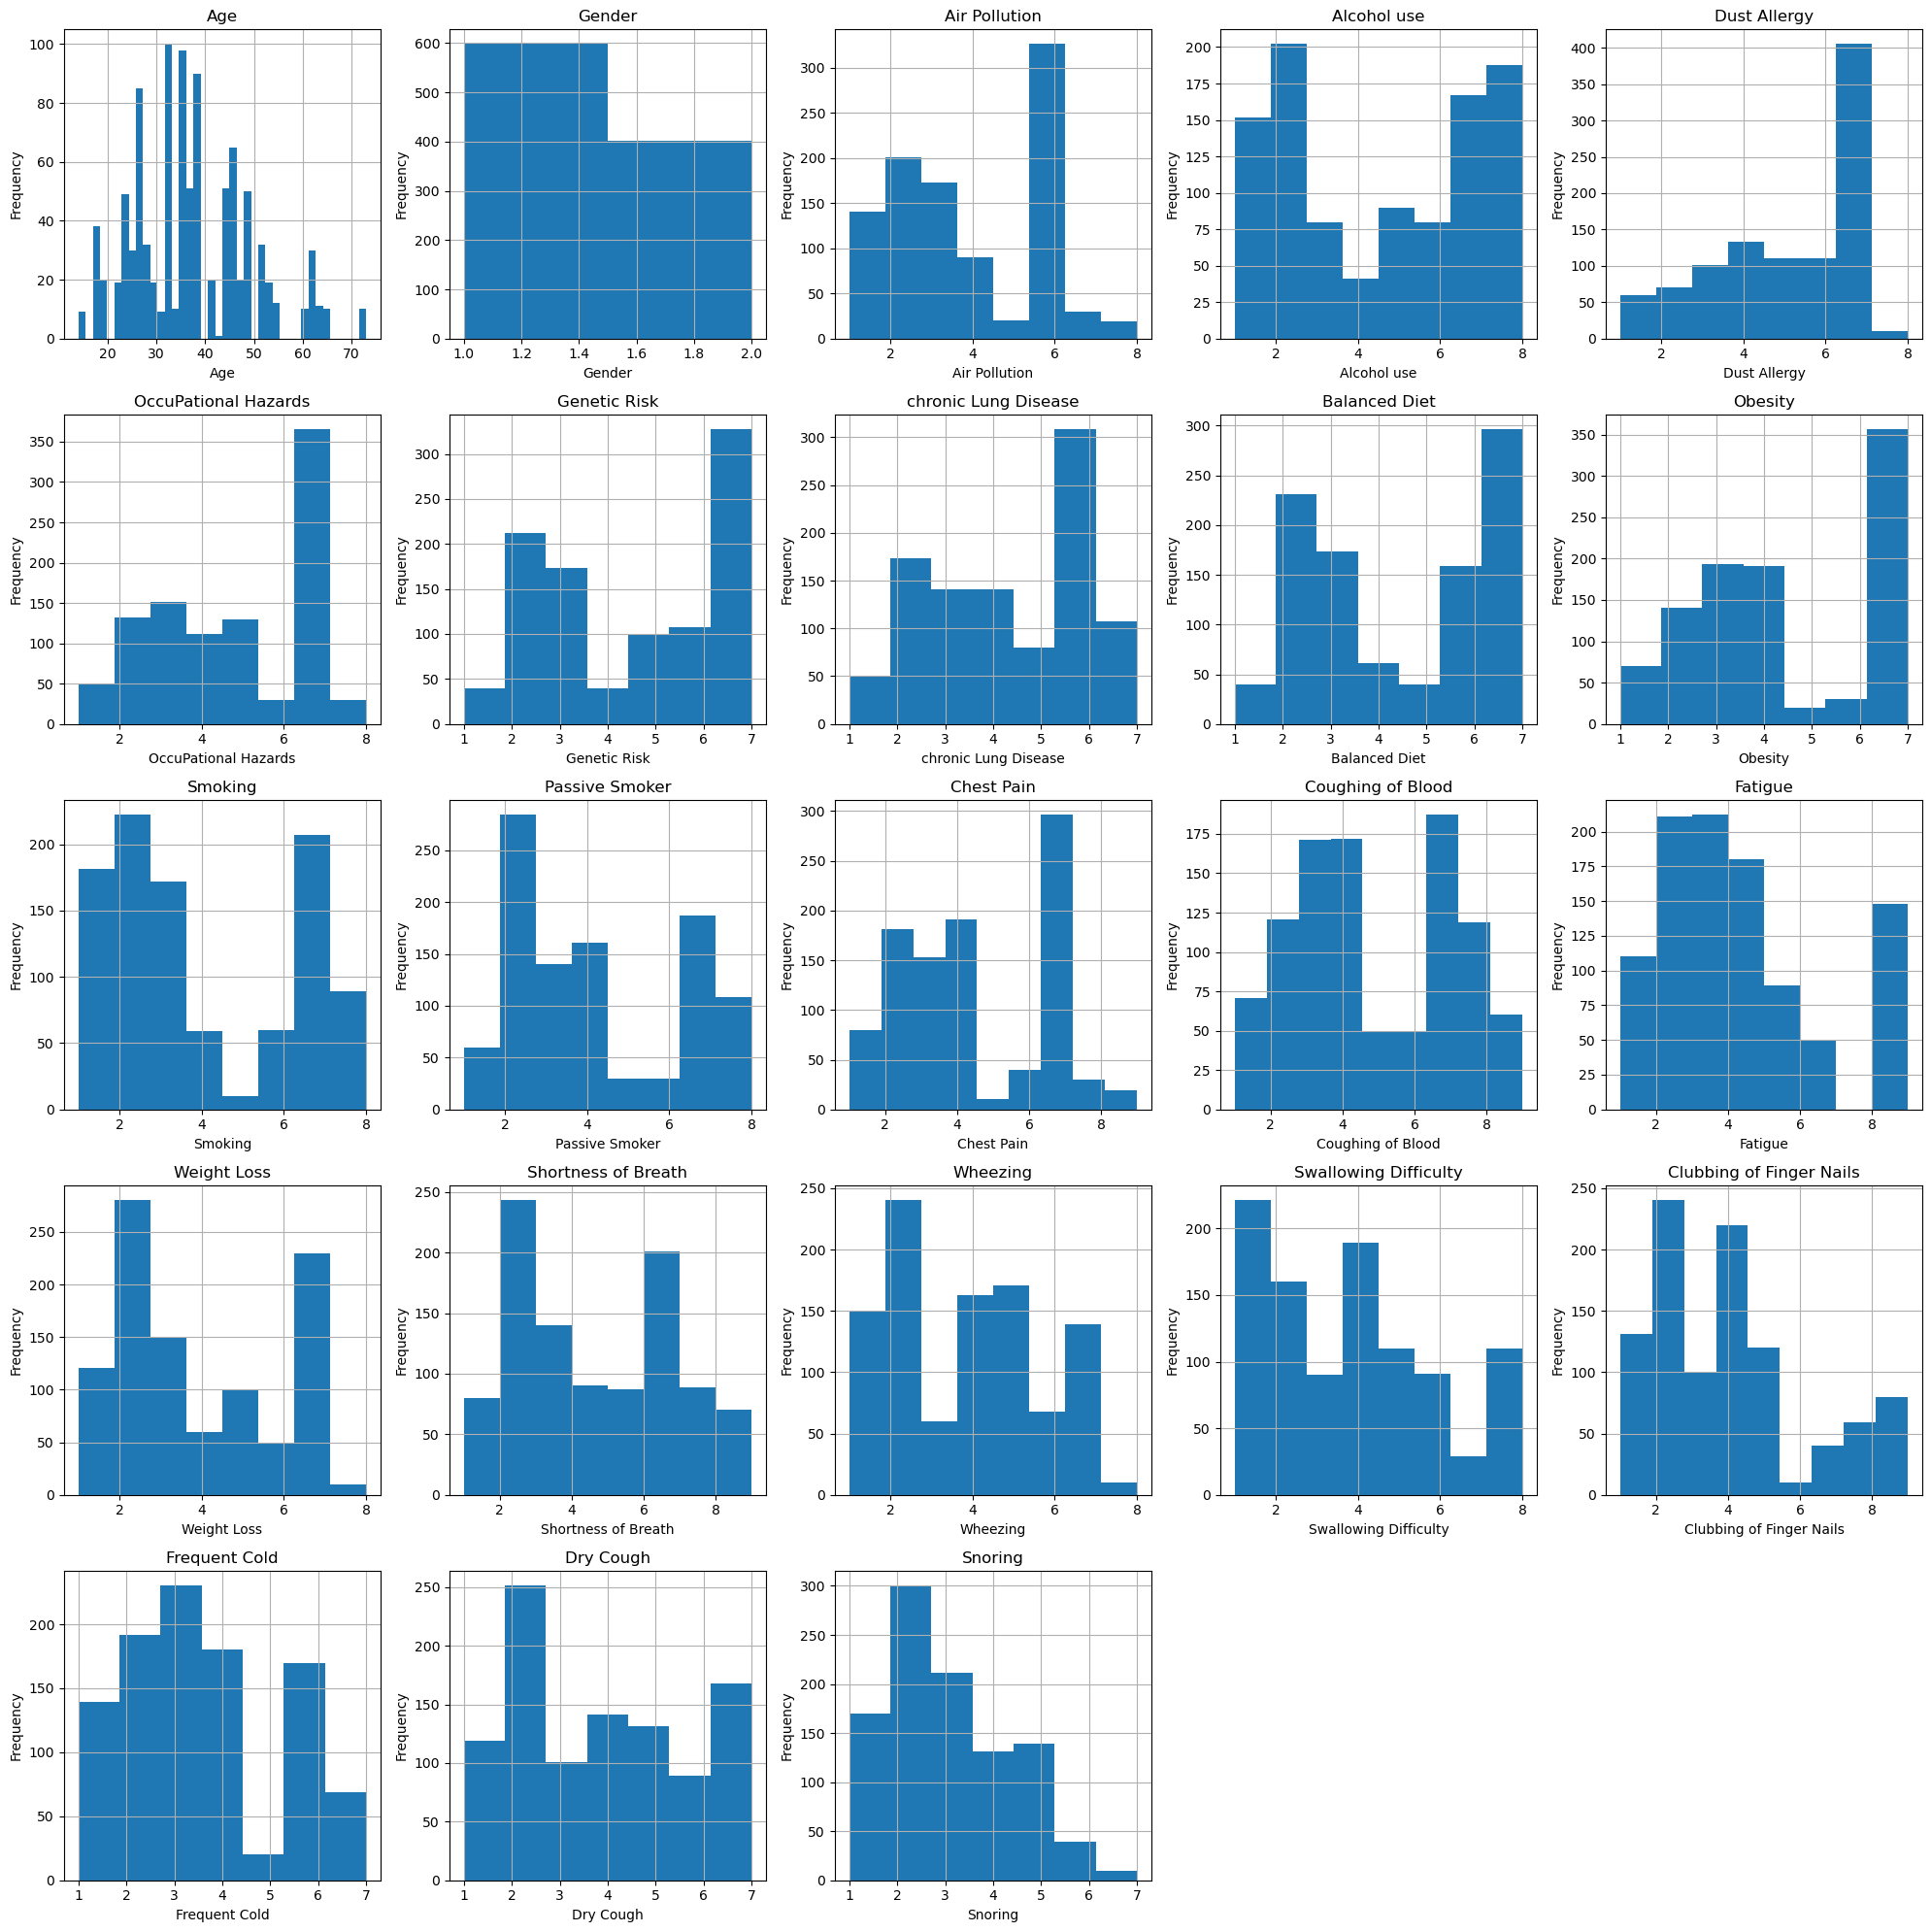

In [50]:
# Define a list of columns to include in the plot, excluding non-numeric features if needed
numeric_columns = lung_categorical.select_dtypes(include=['int64', 'float64']).columns

# Set up the plotting grid
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))  
axes = axes.flatten()  # Flatten to easily index each subplot

# Plot each column with appropriate bins
for i, column in enumerate(numeric_columns):
    unique_values = lung_categorical[column].nunique()  # Get number of unique values for each feature
    lung_categorical[column].hist(bins=unique_values, ax=axes[i])  # Set bins to number of unique values
    axes[i].set_title(column)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

# Hide any remaining unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

1. The Gender feature has a noticable imbalance towards one of the genders, and it is not clear which.
2. Featres such as 'Air Pollution', 'Dust Allergy' and 'Occupational Hazards' have one value (6 or 7) dominating other values (have significantly more instances), as well as have somewhat similar distribution, which makes them potntially related
3. Features such as 'Alcohol Use', 'Balanced Diet', 'Smoking', have two peaks: one near the higher values, one near the lower values, with a trough in between. For such features itman tht people tend to either participate in such lifestyle choices a lot or not at all. Potentailly, these features have a stronger correlation to the target class.
4. Overal thre is a lot of variety in how the values are distributed for different features

#### Computing correlation of features to target class

In [52]:
# Check if 'Level' column is non-numeric before mapping
if lung_categorical['Level'].dtype == 'object':
    # Map the 'Level' column to numerical values
    lung_categorical['Level'] = lung_categorical['Level'].map({'Low': 1, 'Medium': 2, 'High': 3})
else:
    print("'Level' column is already numeric.")


# Select only numeric columns in the DataFrame
numeric_df = lung_categorical.select_dtypes(include=['number'])

# Compute the correlation matrix on the numeric data only
correlation_matrix = numeric_df.corr()

# Display the correlations with the 'Level' feature, sorted by absolute value in descending order
correlation_with_level = correlation_matrix['Level'].abs().sort_values(ascending=False)
print("Correlations with Level (target variable):")
print(correlation_with_level)


'Level' column is already numeric.
Correlations with Level (target variable):
Level                       1.000000
Obesity                     0.827435
Coughing of Blood           0.782092
Alcohol use                 0.718710
Dust Allergy                0.713839
Balanced Diet               0.706273
Passive Smoker              0.703594
Genetic Risk                0.701303
OccuPational Hazards        0.673255
Chest Pain                  0.645461
Air Pollution               0.636038
Fatigue                     0.625114
chronic Lung Disease        0.609971
Smoking                     0.519530
Shortness of Breath         0.497024
Frequent Cold               0.444017
Dry Cough                   0.373968
Weight Loss                 0.352738
Snoring                     0.289366
Clubbing of Finger Nails    0.280063
Swallowing Difficulty       0.249142
Wheezing                    0.242794
Gender                      0.164985
Age                         0.060048
Name: Level, dtype: float64


A wide range of corelations can be observed.

Features like such as Obesity, Coughing of Blood, Alcohol use, Dust Allergy, Balanced Diet, etc have a strong correlation (> 0.7), obesity bein thhe strongest at (0.83)

Features such as Snoring, Wheezing, Gender and Age have a very weak correlation (<0.4).

What is unusual is that being a passive smoker has a stronger correlation tan being a smoker, for this dataset. 

Another observation is that age is not at all correlated with risk, which can have to do with the nature of the dataset and target class determining the risk based on a combination of factors, rather than being a diagnosis.

Feature combination will not be perfromed due to multiple features having a strong correlation already.